In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import math
import syllabenn_ranna_kw as syl
import codecs
import os
from collections import defaultdict


In [3]:
infiles = os.listdir("kernewek_corpus/kemmyn_prefstrip")
print(infiles)

['mckk_stripped.txt', 'solempnyta_kk.txt', 'skeulanyeth1_kw_kk.txt', 'bmkk_stripped.txt', 'omkkks_stripped.txt', 'tregkk_stripped_removebrackets3_removecrossed.txt', 'charfrag_kk_stripped.txt', 'tolkien_kk.txt', 'rdkk_stripped.txt', 'cwkk_stripped.txt', 'pckk_stripped.txt']


In [4]:
fnamestuple = enumerate(infiles)

In [5]:
Nf = -1
while (not(Nf in range(11))):
    try:
        print(list(fnamestuple))
        Nf = input("choose number between 0 and 10 to select file\n")
        Nf = int(Nf)
    except:
        print("should be integer betweeen 0-10")

[(0, 'mckk_stripped.txt'), (1, 'solempnyta_kk.txt'), (2, 'skeulanyeth1_kw_kk.txt'), (3, 'bmkk_stripped.txt'), (4, 'omkkks_stripped.txt'), (5, 'tregkk_stripped_removebrackets3_removecrossed.txt'), (6, 'charfrag_kk_stripped.txt'), (7, 'tolkien_kk.txt'), (8, 'rdkk_stripped.txt'), (9, 'cwkk_stripped.txt'), (10, 'pckk_stripped.txt')]
choose number between 0 and 10 to select file
7


In [6]:
infiles2 = [os.path.join("kernewek_corpus/kemmyn_prefstrip", f) for f in infiles]

In [7]:
# run the syllable segmentation program
# as the default, it will use reverse segmentation starting from the end of each word
infilename = infiles[Nf]
infilename2 = infiles2[Nf]

infile = codecs.open(infilename2, "r", encoding="utf-8", errors="replace")
inputtext = infile.read()
inputtext = syl.preprocess2ASCII(inputtext)
regexps = syl.kwKemmynRegExp
rannans = syl.RannaSyllabenn(inputtext)
counts = syl.CountAllSyls()
for i in rannans.geryow:
    g = syl.Ger(i,rannans, counts, fwds=False, regexps=regexps,
                    FSSmode=False,
                    CYmode=False, gwarnya=False)
#print(syl.totalcountsOutput(counts))

In [8]:
# running the above program will mean a variable counts is created which is a CountAllSyls object
# which contains a number of variables such as counts.NSylTotal
print("Total number of syllables in text = {NSyl}".format(NSyl=counts.NSylTotal))

Total number of syllables in text = 231839


In [9]:
# get the dictionary of syllables and their frequencies out of the CountAllSyls object
# and use the function to remove any punctuation characters
AllSyllablesDict_nopunct = counts.remove_punctchars(counts.AllSyllablesDict)

In [10]:
#make it into a list of tuples
AllSyllablesDictkv = [(k,v) for (k,v) in AllSyllablesDict_nopunct.items()]

In [11]:
# sort the syllables alphabetically
counts.AllSyllablesAlphaSort = sorted(AllSyllablesDictkv, key=lambda AllSyllablesDictkv:
                                     AllSyllablesDictkv[0], reverse=False)

In [12]:
print("All syllables found in text, with frequencies")
print(counts.AllSyllablesAlphaSort)

All syllables found in text, with frequencies
[('a', 13830), ('acch', 1), ('ad', 3), ('adh', 5), ('agh', 43), ('aj', 109), ('al', 19), ('algh', 1), ('all', 96), ('als', 23), ('am', 86), ('an', 6967), ('and', 7), ('ank', 36), ('ann', 1), ('ans', 61), ('ar', 703), ('ardh', 1), ('arg', 3), ('argh', 1), ('arm', 2), ('arr', 1), ('art', 1), ('arth', 1), ('arv', 9), ('as', 361), ('ash', 3), ('ass', 20), ('at', 39), ('ath', 46), ('av', 12), ('aw', 2), ('ay', 86), ('ayr', 79), ('ba', 329), ('bad', 1), ('badh', 6), ('bag', 60), ('bak', 1), ('bal', 48), ('balv', 1), ('ban', 52), ('band', 2), ('bann', 96), ('bar', 51), ('bard', 2), ('barr', 8), ('barth', 140), ('barv', 4), ('bas', 37), ('bask', 5), ('bass', 2), ('bat', 4), ('bath', 4), ('bav', 83), ('baw', 1), ('bay', 11), ('bayn', 3), ('be', 186), ('bech', 2), ('bedh', 6), ('begh', 15), ('bek', 3), ('bel', 43), ('bell', 94), ('ben', 86), ('benn', 171), ('ber', 131), ('berl', 1), ('bern', 39), ('berr', 83), ('berth', 18), ('bes', 485), ('bess', 1)

In [13]:
print("Total number of different syllables = {t}".format(t=len(counts.AllSyllablesAlphaSort)))

Total number of different syllables = 2956


In [14]:
# punctuation characters are now removed

In [15]:
len([t for t in counts.AllSyllablesAlphaSort if "'" in t[0]])

0

In [16]:
len([t for t in counts.AllSyllablesAlphaSort if "-" in t[0]])

0

In [17]:
len([t for t in counts.AllSyllablesAlphaSort if '"' in t[0]])

0

In [18]:
# count up how many syllables start with each letter of the alphabet

In [19]:
# q, x not used in Kernewek Kemmyn
# z only for a few loan words, and c only in digraph ch but haven't made assumption here

In [20]:
alpha_lowercase = "abcdefghijklmnopqrstuvwxyz"

In [21]:
sylls_letter = defaultdict(list)
totalsyls_letter = defaultdict(int)
for i in alpha_lowercase:
    # for each letter, create a list of tuples of syllables and frequencies
    letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][0].lower()==i]
    #print(letter_dictkv)
    for t in letter_dictkv:
        # append to the list of all syllables starting with the letter
        sylls_letter[i].append(t)
    # list the syllables starting with the letter
    print("Syllables starting with {L}".format(L=i))
    print(sylls_letter[i])
    # fill the totalsyls_letter dictionary
    # with the sum of the frequencies of all syllables
    # starting with each letter
    total_starting_letter = sum(t[1] for t in letter_dictkv)
    print("total number = {q}".format(q=total_starting_letter))
    totalsyls_letter[i] = total_starting_letter

Syllables starting with a
[('a', 13830), ('acch', 1), ('ad', 3), ('adh', 5), ('agh', 43), ('aj', 109), ('al', 19), ('algh', 1), ('all', 96), ('als', 23), ('am', 86), ('an', 6967), ('and', 7), ('ank', 36), ('ann', 1), ('ans', 61), ('ar', 703), ('ardh', 1), ('arg', 3), ('argh', 1), ('arm', 2), ('arr', 1), ('art', 1), ('arth', 1), ('arv', 9), ('as', 361), ('ash', 3), ('ass', 20), ('at', 39), ('ath', 46), ('av', 12), ('aw', 2), ('ay', 86), ('ayr', 79)]
total number = 22658
Syllables starting with b
[('ba', 329), ('bad', 1), ('badh', 6), ('bag', 60), ('bak', 1), ('bal', 48), ('balv', 1), ('ban', 52), ('band', 2), ('bann', 96), ('bar', 51), ('bard', 2), ('barr', 8), ('barth', 140), ('barv', 4), ('bas', 37), ('bask', 5), ('bass', 2), ('bat', 4), ('bath', 4), ('bav', 83), ('baw', 1), ('bay', 11), ('bayn', 3), ('be', 186), ('bech', 2), ('bedh', 6), ('begh', 15), ('bek', 3), ('bel', 43), ('bell', 94), ('ben', 86), ('benn', 171), ('ber', 131), ('berl', 1), ('bern', 39), ('berr', 83), ('berth', 18

In [22]:
print("Total syllables starting with each letter of the alphabet:\n{T}".format(T=totalsyls_letter))

Total syllables starting with each letter of the alphabet:
defaultdict(<class 'int'>, {'a': 22658, 'b': 8247, 'c': 314, 'd': 26234, 'e': 8940, 'f': 4538, 'g': 14832, 'h': 15699, 'i': 2067, 'j': 608, 'k': 7018, 'l': 10273, 'm': 10805, 'n': 13134, 'o': 7621, 'p': 5517, 'q': 0, 'r': 8447, 's': 14513, 't': 10290, 'u': 1009, 'v': 11168, 'w': 10149, 'x': 0, 'y': 17733, 'z': 25})


In [23]:
# repeat the process for two letter combinations starting the syllable
sylls_2letter = defaultdict(list)
totalsyls_2letter = defaultdict(int)
# this time, assume no q, x, z
alpha_lowercase = "abcdefghijklmnoprstuvwy"

In [24]:
# use a nested loop for the two letter combinations
for i in alpha_lowercase:
    for j in alpha_lowercase:
        twoletters = i+j
        #print(twoletters)
        # use .startswith rather than == to avoid error with single character syllables
        letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][0:2].startswith(twoletters)]
        #print(letter_dictkv)
        for t in letter_dictkv:
            sylls_2letter[twoletters].append(t)
        if len(letter_dictkv) > 0:
            print("Syllables starting with {L}".format(L=twoletters))
            print(sylls_2letter[twoletters])
            total_starting_2letter = sum(t[1] for t in letter_dictkv)
            totalsyls_2letter[twoletters] = total_starting_2letter

Syllables starting with ac
[('acch', 1)]
Syllables starting with ad
[('ad', 3), ('adh', 5)]
Syllables starting with ag
[('agh', 43)]
Syllables starting with aj
[('aj', 109)]
Syllables starting with al
[('al', 19), ('algh', 1), ('all', 96), ('als', 23)]
Syllables starting with am
[('am', 86)]
Syllables starting with an
[('an', 6967), ('and', 7), ('ank', 36), ('ann', 1), ('ans', 61)]
Syllables starting with ar
[('ar', 703), ('ardh', 1), ('arg', 3), ('argh', 1), ('arm', 2), ('arr', 1), ('art', 1), ('arth', 1), ('arv', 9)]
Syllables starting with as
[('as', 361), ('ash', 3), ('ass', 20)]
Syllables starting with at
[('at', 39), ('ath', 46)]
Syllables starting with av
[('av', 12)]
Syllables starting with aw
[('aw', 2)]
Syllables starting with ay
[('ay', 86), ('ayr', 79)]
Syllables starting with ba
[('ba', 329), ('bad', 1), ('badh', 6), ('bag', 60), ('bak', 1), ('bal', 48), ('balv', 1), ('ban', 52), ('band', 2), ('bann', 96), ('bar', 51), ('bard', 2), ('barr', 8), ('barth', 140), ('barv', 4),

[('sma', 1), ('sman', 1), ('smay', 1), ('sme', 12), ('smi', 2), ('smy', 87), ('smyg', 10), ('smyk', 12)]
Syllables starting with sn
[('sna', 3), ('sner', 1), ('snet', 8), ('sneth', 3), ('snett', 1), ('sno', 1), ('snod', 2), ('snor', 1)]
Syllables starting with so
[('so', 228), ('soe', 6), ('soedh', 6), ('sogh', 5), ('som', 92), ('son', 229), ('sons', 248), ('sop', 1), ('sor', 26), ('sorn', 1), ('sorr', 19), ('sos', 29), ('sot', 4), ('soth', 96), ('sou', 2), ('sour', 3), ('sov', 32), ('sow', 866), ('sowgh', 24), ('sowl', 2), ('sowr', 3)]
Syllables starting with sp
[('spa', 3), ('spar', 4), ('spas', 13), ('spass', 5), ('spe', 9), ('sper', 23), ('spern', 1), ('spi', 27), ('spit', 12), ('splan', 112), ('splann', 161), ('splat', 2), ('sple', 2), ('spleg', 4), ('splen', 2), ('splet', 1), ('splu', 2), ('spoes', 3), ('spows', 21), ('spoynt', 2), ('spre', 1), ('sprenn', 1), ('sprof', 1), ('spu', 1), ('sput', 3), ('spy', 9), ('spys', 3)]
Syllables starting with st
[('sta', 54), ('stag', 39), ('s

In [25]:
print("Total syllables starting with each two letters of the alphabet:\n{T}".format(T=totalsyls_2letter))
print("Total number of different 2 letter combinations that start syllables = {N2}".format(N2=len(totalsyls_2letter)))

Total syllables starting with each two letters of the alphabet:
defaultdict(<class 'int'>, {'ac': 1, 'ad': 8, 'ag': 43, 'aj': 109, 'al': 139, 'am': 86, 'an': 7072, 'ar': 722, 'as': 384, 'at': 85, 'av': 12, 'aw': 2, 'ay': 165, 'ba': 951, 'be': 1550, 'bi': 404, 'bl': 330, 'bo': 1918, 'br': 1096, 'bu': 256, 'by': 1742, 'ca': 3, 'ch': 311, 'da': 1750, 'de': 3278, 'dh': 12695, 'di': 1781, 'dl': 1, 'do': 2224, 'dr': 3287, 'du': 478, 'dy': 740, 'ed': 9, 'ef': 7, 'ek': 36, 'el': 509, 'em': 50, 'en': 437, 'er': 413, 'es': 566, 'et': 228, 'eu': 372, 'ev': 2976, 'ew': 117, 'ey': 128, 'fa': 462, 'fe': 898, 'fi': 297, 'fl': 95, 'fo': 1001, 'fr': 1155, 'fu': 282, 'fy': 348, 'ga': 4338, 'ge': 1550, 'gg': 3, 'gh': 1249, 'gi': 266, 'gl': 927, 'gn': 20, 'go': 2759, 'gr': 529, 'gu': 300, 'gw': 2355, 'gy': 536, 'ha': 8267, 'he': 2564, 'hi': 917, 'ho': 1226, 'hu': 155, 'hw': 1942, 'hy': 628, 'id': 4, 'if': 1, 'il': 6, 'in': 51, 'ir': 2, 'is': 33, 'it': 4, 'ja': 58, 'je': 68, 'ji': 167, 'jo': 48, 'ju': 20, 

In [26]:
# convert the defaultdict into a list of tuples
syls_2letter = [t for t in totalsyls_2letter]

In [27]:
# list of integers of the frequencies
syls_2letterN = [totalsyls_2letter[t] for t in totalsyls_2letter]
print(syls_2letterN)

[1, 8, 43, 109, 139, 86, 7072, 722, 384, 85, 12, 2, 165, 951, 1550, 404, 330, 1918, 1096, 256, 1742, 3, 311, 1750, 3278, 12695, 1781, 1, 2224, 3287, 478, 740, 9, 7, 36, 509, 50, 437, 413, 566, 228, 372, 2976, 117, 128, 462, 898, 297, 95, 1001, 1155, 282, 348, 4338, 1550, 3, 1249, 266, 927, 20, 2759, 529, 300, 2355, 536, 8267, 2564, 917, 1226, 155, 1942, 628, 4, 1, 6, 51, 2, 33, 4, 58, 68, 167, 48, 20, 247, 939, 1547, 106, 537, 34, 2021, 500, 270, 169, 895, 1296, 3994, 916, 1929, 1549, 182, 407, 3632, 3643, 434, 1149, 34, 1913, 4776, 3042, 1199, 1466, 57, 2594, 69, 2, 4, 515, 816, 33, 1450, 47, 66, 52, 109, 2666, 891, 1157, 2, 153, 154, 1323, 420, 411, 1006, 2592, 2666, 1612, 637, 250, 690, 3718, 1, 2360, 263, 608, 2190, 306, 126, 20, 1922, 428, 1390, 178, 313, 690, 1418, 2224, 2032, 643, 3, 1087, 1313, 191, 606, 773, 97, 1, 606, 7, 16, 1230, 4131, 755, 87, 1455, 606, 34, 4, 2866, 2036, 2686, 476, 337, 2415, 1363, 99, 737, 2761, 248, 3, 128, 49, 6189, 1422, 3, 63, 1214, 1, 1, 1599, 9]


Text(0.5, 1.0, 'Counts of initial two letters of all syllables in tolkien_kk.txt')

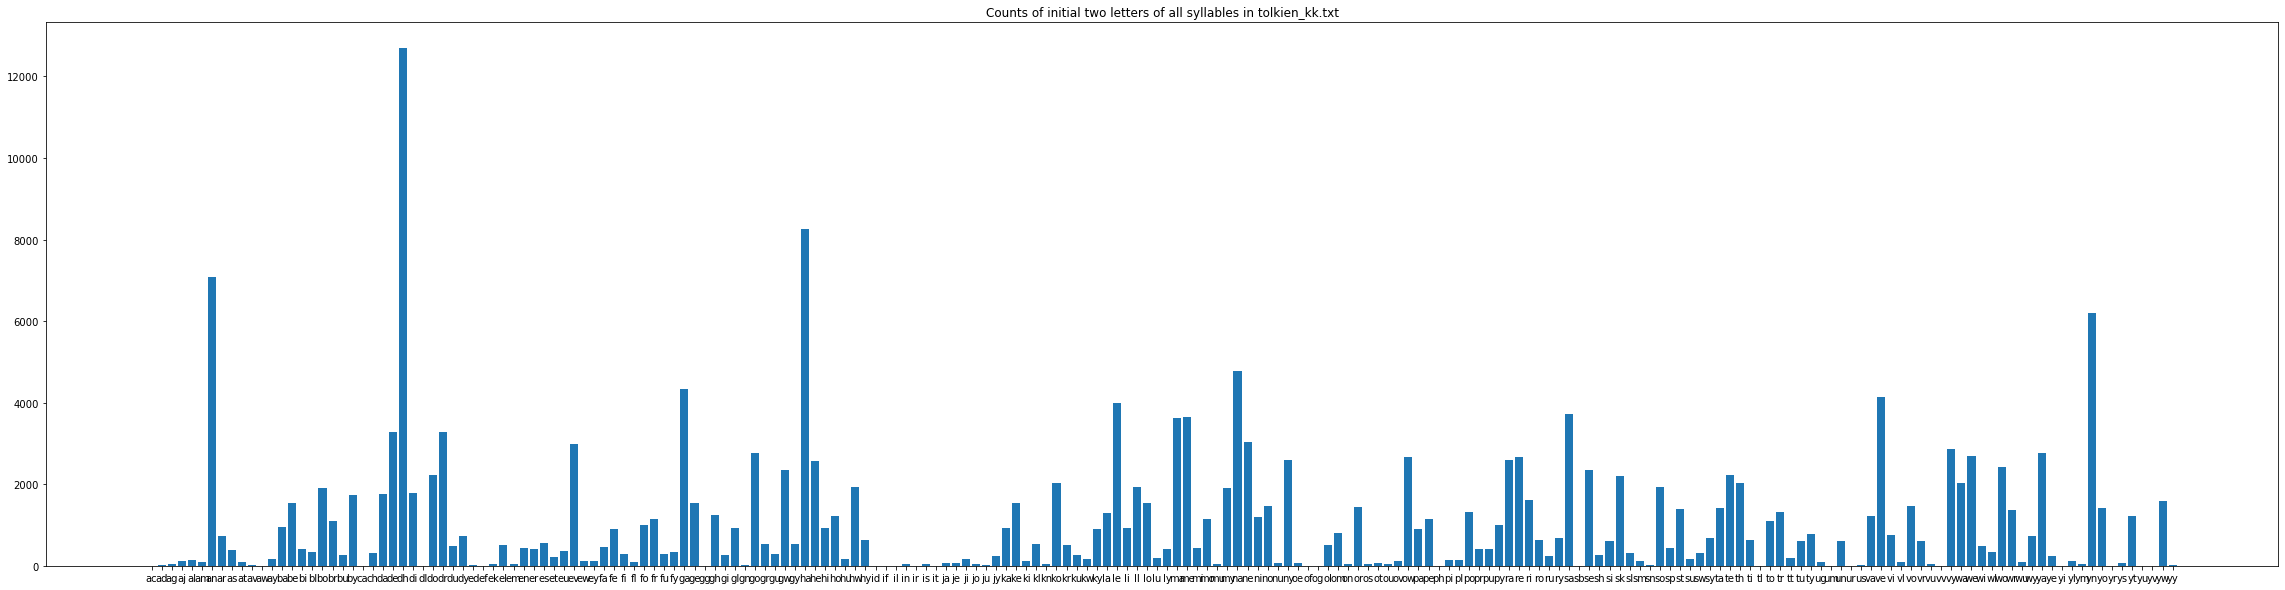

In [28]:
# create a matplotlib figure
fig = plt.figure(figsize=[40,10])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(totalsyls_2letter))
p1 = ax.bar(ind, syls_2letterN)
ax.set_xticks(ind)
ax.set_xticklabels(syls_2letter)
title = "Counts of initial two letters of all syllables in {f}".format(f=infilename)
ax.set_title(title)

In [29]:
# create a 2D histogram of the frequencies
hist2d = np.zeros([len(alpha_lowercase),len(alpha_lowercase)])
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = a+b
        hist2d[i][j] = math.sqrt(totalsyls_2letter[twoletters])

In [30]:
#print(hist2d)

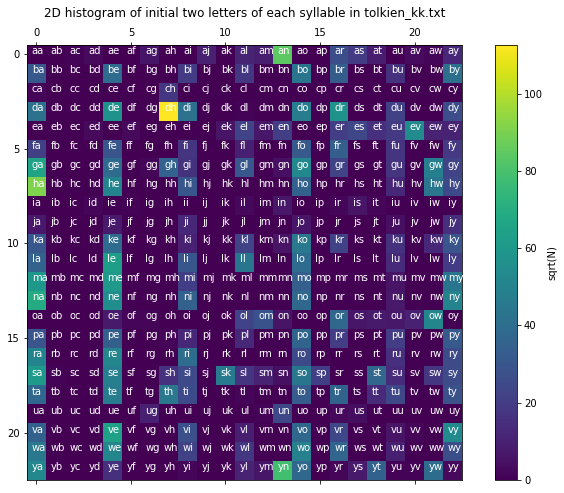

In [31]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(alpha_lowercase))
im = ax.matshow(hist2d)
title = "2D histogram of initial two letters of each syllable in {f}".format(f=infilename)
ax.set_title(title)
cbar = plt.colorbar(im)
cbar.set_label("sqrt(N)")
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = b+a
        ax.annotate(twoletters,[-0.25+i,j],color="w")

In [32]:
# sort by the end letter of the syllable
counts.AllSyllablesRevAlphaSort = sorted(AllSyllablesDictkv, key=lambda AllSyllablesDictkv:
                                     AllSyllablesDictkv[0][-1], reverse=False)

In [33]:
print("All syllables found in text, with frequencies, sorted by final letter")
print(counts.AllSyllablesRevAlphaSort)

All syllables found in text, with frequencies, sorted by final letter
[('ba', 329), ('a', 13830), ('sa', 2927), ('ha', 5178), ('ya', 1466), ('dra', 212), ('na', 2684), ('da', 787), ('dha', 1565), ('lla', 574), ('ta', 968), ('ga', 1471), ('va', 300), ('tha', 291), ('ka', 482), ('ttha', 171), ('ma', 1461), ('la', 534), ('wa', 152), ('ska', 110), ('pa', 87), ('vra', 118), ('wra', 180), ('tra', 402), ('ra', 516), ('fa', 163), ('bla', 21), ('gwa', 98), ('gra', 18), ('ja', 26), ('wla', 165), ('dhra', 16), ('gha', 57), ('gwra', 20), ('pra', 14), ('pla', 9), ('ca', 1), ('sla', 10), ('thra', 26), ('gla', 24), ('sha', 7), ('swa', 43), ('stra', 19), ('kwa', 26), ('stla', 3), ('kwra', 10), ('bra', 14), ('hwra', 16), ('vva', 4), ('sna', 3), ('sta', 54), ('vla', 7), ('skra', 3), ('skwa', 1), ('kra', 7), ('fra', 3), ('cha', 8), ('tla', 1), ('gwla', 10), ('ggha', 2), ('spa', 3), ('sma', 1), ('fla', 1), ('gna', 1), ('za', 6), ('heb', 293), ('pub', 72), ('mab', 30), ('neb', 240), ('dyb', 79), ('bub', 23

In [34]:
alpha_lowercase = "abcdefghijklmnopqrstuvwxyz"
sylls_letter_end = defaultdict(list)
totalsyls_letter_end = defaultdict(int)
for i in alpha_lowercase:
    # for each letter, create a list of tuples of syllables and frequencies
    letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][-1].lower()==i]
    #print(letter_dictkv)
    for t in letter_dictkv:
        # append to the list of all syllables ending with the letter
        sylls_letter_end[i].append(t)
    # list the syllables ending with the letter
    print("Syllables ending with {L}".format(L=i))
    print(sylls_letter_end[i])
    # fill the totalsyls_letter_end dictionary
    # with the sum of the frequencies of all syllables
    # ending with each letter
    total_ending_letter = sum(t[1] for t in letter_dictkv)
    print("total number = {q}".format(q=total_ending_letter))
    totalsyls_letter_end[i] = total_ending_letter

Syllables ending with a
[('a', 13830), ('ba', 329), ('bla', 21), ('bra', 14), ('ca', 1), ('cha', 8), ('da', 787), ('dha', 1565), ('dhra', 16), ('dra', 212), ('fa', 163), ('fla', 1), ('fra', 3), ('ga', 1471), ('ggha', 2), ('gha', 57), ('gla', 24), ('gna', 1), ('gra', 18), ('gwa', 98), ('gwla', 10), ('gwra', 20), ('ha', 5178), ('hwra', 16), ('ja', 26), ('ka', 482), ('kra', 7), ('kwa', 26), ('kwra', 10), ('la', 534), ('lla', 574), ('ma', 1461), ('na', 2684), ('pa', 87), ('pla', 9), ('pra', 14), ('ra', 516), ('sa', 2927), ('sha', 7), ('ska', 110), ('skra', 3), ('skwa', 1), ('sla', 10), ('sma', 1), ('sna', 3), ('spa', 3), ('sta', 54), ('stla', 3), ('stra', 19), ('swa', 43), ('ta', 968), ('tha', 291), ('thra', 26), ('tla', 1), ('tra', 402), ('ttha', 171), ('va', 300), ('vla', 7), ('vra', 118), ('vva', 4), ('wa', 152), ('wla', 165), ('wra', 180), ('ya', 1466), ('za', 6)]
total number = 37716
Syllables ending with b
[('bib', 2), ('bob', 9), ('bub', 23), ('chub', 2), ('dhyb', 1), ('dyb', 79), (

In [35]:
print("Total syllables ending with each letter of the alphabet:\n{T}".format(T=totalsyls_letter_end))

Total syllables ending with each letter of the alphabet:
defaultdict(<class 'int'>, {'a': 37716, 'b': 1100, 'c': 0, 'd': 498, 'e': 23510, 'f': 821, 'g': 4757, 'h': 13150, 'i': 11214, 'j': 212, 'k': 2447, 'l': 9231, 'm': 4235, 'n': 31887, 'o': 12640, 'p': 627, 'q': 0, 'r': 15833, 's': 28917, 't': 2094, 'u': 3164, 'v': 5187, 'w': 9790, 'x': 0, 'y': 12809, 'z': 0})


In [36]:
# count up how many syllables end with each letter of the alphabet
sylls_2letter_end = defaultdict(list)
totalsyls_2letter_end = defaultdict(int)
alpha_lowercase = "abcdefghijklmnoprstuvwy"

In [37]:
for i in alpha_lowercase:
    for j in alpha_lowercase:
        twoletters = i+j
        #print(twoletters)
        # use .endswith rather than == to avoid error with single character syllables
        letter_dictkv_end = [t for t in counts.AllSyllablesRevAlphaSort if t[0][-2:].endswith(twoletters)]
        #print(letter_dictkv)
        for t in letter_dictkv_end:
            sylls_2letter_end[twoletters].append(t)
        if len(letter_dictkv_end) > 0:
            print("Syllables ending with {L}".format(L=twoletters))
            print(sylls_2letter_end[twoletters])
            total_ending_2letter = sum(t[1] for t in letter_dictkv_end)
            totalsyls_2letter_end[twoletters] = total_ending_2letter

Syllables ending with ab
[('mab', 30), ('vab', 3), ('hab', 1)]
Syllables ending with ad
[('sad', 9), ('ad', 3), ('lad', 17), ('dad', 1), ('zad', 8), ('glad', 5), ('rad', 2), ('bad', 1)]
Syllables ending with af
[('daf', 3), ('dhaf', 4), ('kaf', 3), ('skaf', 21), ('hwaf', 1), ('kraf', 5), ('haf', 1), ('gaf', 2), ('naf', 1), ('graf', 1)]
Syllables ending with ag
[('bag', 60), ('hag', 1982), ('nag', 173), ('rag', 1028), ('prag', 68), ('stag', 39), ('wag', 2), ('gwag', 34), ('jag', 1), ('mag', 3), ('lag', 5), ('dag', 2)]
Syllables ending with aj
[('aj', 109), ('maj', 4), ('saj', 8), ('jaj', 1)]
Syllables ending with ak
[('shak', 15), ('sak', 18), ('tak', 5), ('rak', 61), ('lak', 1), ('krak', 3), ('dak', 10), ('bak', 1), ('hak', 3), ('gwrak', 1), ('gwak', 3)]
Syllables ending with al
[('val', 431), ('dal', 57), ('pal', 20), ('fal', 6), ('al', 19), ('tal', 62), ('kal', 2), ('mal', 65), ('bal', 48), ('wal', 13), ('hal', 47), ('dhal', 3), ('gal', 13), ('thal', 3), ('nal', 1), ('yal', 8), ('gha

Syllables ending with ri
[('dri', 119), ('ri', 640), ('bri', 117), ('tri', 154), ('stri', 100), ('skri', 53), ('pri', 14), ('vri', 87), ('kri', 43), ('wri', 35), ('gri', 128), ('gwri', 10), ('dhri', 11), ('thri', 1)]
Syllables ending with rj
[('charj', 1)]
Syllables ending with rk
[('merk', 21), ('park', 10), ('ork', 18), ('verk', 10), ('mark', 2), ('stark', 1)]
Syllables ending with rl
[('berl', 1), ('perl', 1)]
Syllables ending with rm
[('garm', 8), ('gorm', 15), ('arm', 2), ('skyrm', 1), ('worm', 1)]
Syllables ending with rn
[('warn', 21), ('vern', 41), ('bern', 39), ('garn', 18), ('gern', 20), ('kern', 4), ('horn', 28), ('dhorn', 99), ('dorn', 63), ('gwarn', 24), ('varn', 27), ('korn', 24), ('tern', 43), ('skern', 12), ('gorn', 111), ('forn', 3), ('kwarn', 1), ('gwern', 2), ('spern', 1), ('sorn', 1), ('karn', 5), ('thorn', 7), ('sarn', 1), ('skorn', 10), ('hern', 1), ('orn', 3), ('fern', 2), ('llyrn', 1), ('llorn', 7), ('born', 11)]
Syllables ending with ro
[('fro', 983), ('dro', 5

In [38]:
print("Total syllables ending with each two letters of the alphabet:\n{T}".format(T=totalsyls_2letter_end))
print("Total number of different 2 letter combinations that end syllables = {N2}".format(N2=len(totalsyls_2letter_end)))

Total syllables ending with each two letters of the alphabet:
defaultdict(<class 'int'>, {'ab': 34, 'ad': 46, 'af': 42, 'ag': 3397, 'aj': 122, 'ak': 121, 'al': 801, 'am': 737, 'an': 10897, 'ap': 36, 'ar': 4165, 'as': 5522, 'at': 148, 'av': 901, 'aw': 318, 'ay': 654, 'ba': 329, 'be': 186, 'bi': 176, 'bo': 606, 'bu': 67, 'by': 692, 'ca': 1, 'ch': 123, 'da': 787, 'de': 1002, 'dh': 4225, 'di': 1462, 'do': 1021, 'dr': 62, 'du': 268, 'dy': 344, 'eb': 541, 'ed': 72, 'ef': 138, 'eg': 270, 'ek': 1269, 'el': 2962, 'em': 1029, 'en': 4032, 'ep': 245, 'er': 4747, 'es': 7392, 'et': 288, 'eu': 1110, 'ev': 3494, 'ew': 585, 'ey': 173, 'fa': 163, 'fe': 163, 'ff': 7, 'fi': 240, 'fo': 117, 'fu': 66, 'fy': 135, 'ga': 1471, 'ge': 657, 'gg': 3, 'gh': 1481, 'gi': 157, 'go': 1176, 'gu': 65, 'gy': 84, 'ha': 7279, 'he': 4562, 'hi': 1574, 'ho': 1829, 'ht': 26, 'hu': 222, 'hy': 803, 'ib': 9, 'id': 32, 'if': 34, 'ig': 56, 'ij': 7, 'ik': 170, 'il': 254, 'im': 49, 'in': 536, 'ir': 1579, 'is': 2576, 'it': 35, 'iv': 14

In [39]:
# convert the defaultdict into a list of tuples
syls_2letter_end = [t for t in totalsyls_2letter_end]
# list of integers of the frequencies
syls_2letter_endN = [totalsyls_2letter_end[t] for t in totalsyls_2letter_end]
print(syls_2letter_endN)

[34, 46, 42, 3397, 122, 121, 801, 737, 10897, 36, 4165, 5522, 148, 901, 318, 654, 329, 186, 176, 606, 67, 692, 1, 123, 787, 1002, 4225, 1462, 1021, 62, 268, 344, 541, 72, 138, 270, 1269, 2962, 1029, 4032, 245, 4747, 7392, 288, 1110, 3494, 585, 173, 163, 163, 7, 240, 117, 66, 135, 1471, 657, 3, 1481, 157, 1176, 65, 84, 7279, 4562, 1574, 1829, 26, 222, 803, 9, 32, 34, 56, 7, 170, 254, 49, 536, 1579, 2576, 35, 145, 315, 26, 13, 166, 20, 1, 111, 592, 671, 197, 38, 612, 194, 55, 1359, 35, 2128, 503, 626, 8, 3062, 4, 454, 500, 156, 3, 747, 1462, 634, 238, 808, 236, 50, 24, 678, 2688, 269, 1103, 966, 67, 195, 3976, 418, 4862, 338, 35, 1261, 105, 4, 568, 32, 237, 2, 143, 334, 1269, 1585, 11, 2517, 2601, 104, 28, 397, 6673, 354, 90, 301, 46, 806, 72, 35, 336, 1594, 9, 3160, 43, 9, 1512, 1, 62, 2, 27, 630, 1937, 586, 183, 69, 190, 106, 247, 2927, 754, 20, 359, 290, 228, 134, 448, 15, 50, 1022, 718, 7301, 415, 274, 192, 396, 501, 101, 13, 1, 773, 11, 79, 478, 106, 364, 119, 1354, 1339, 141, 52, 3

Text(0.5, 1.0, 'Counts of final two letters of all syllables in tolkien_kk.txt')

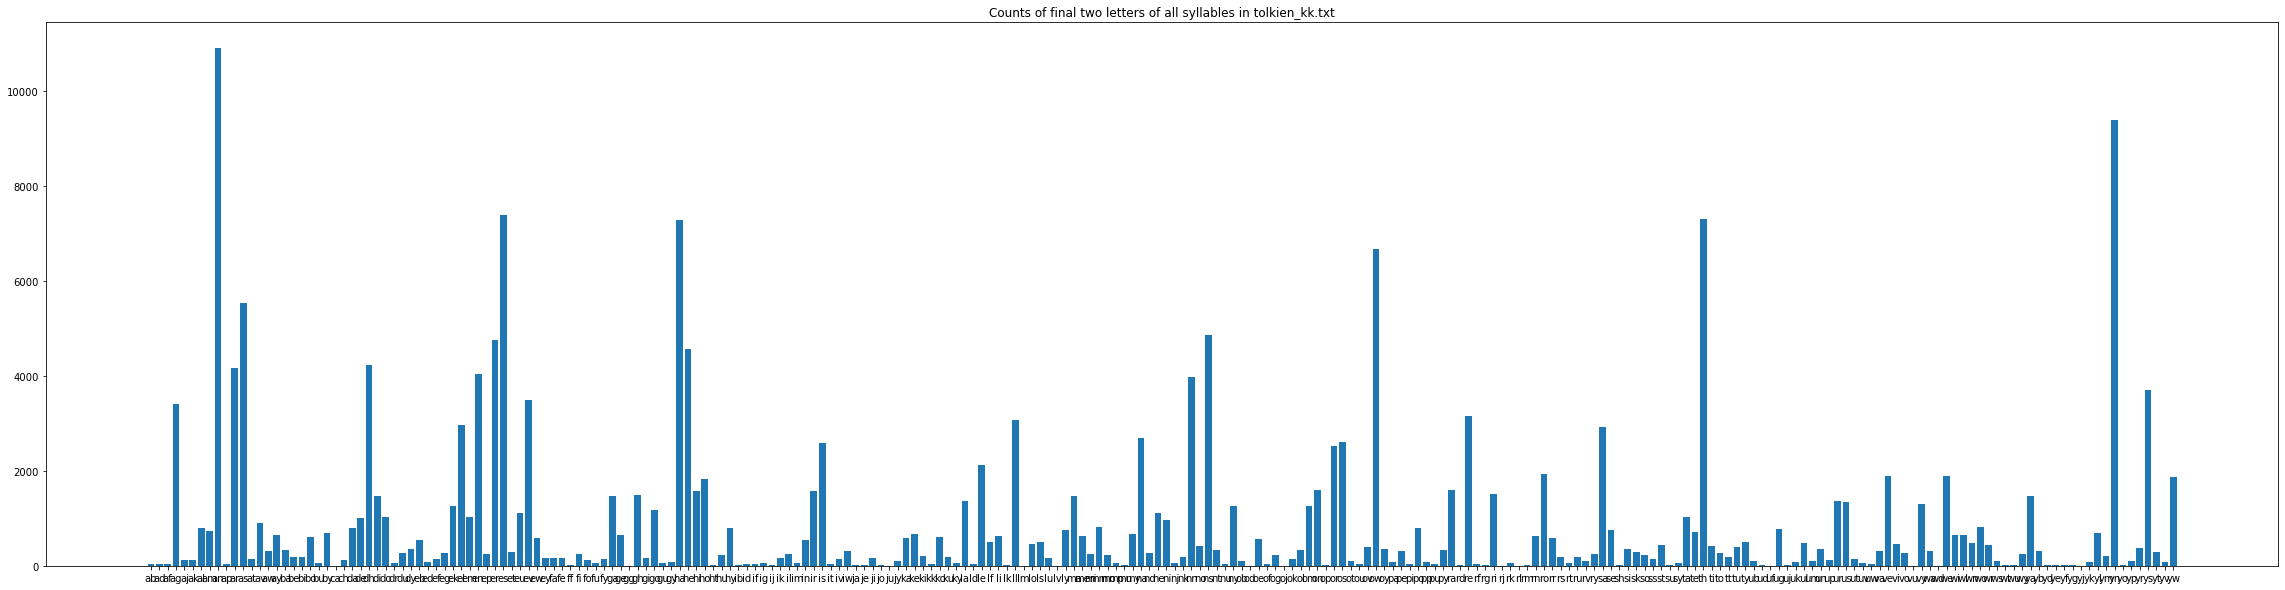

In [40]:
# create a matplotlib figure
fig = plt.figure(figsize=[40,10])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(totalsyls_2letter_end))
p1 = ax.bar(ind, syls_2letter_endN)
ax.set_xticks(ind)
ax.set_xticklabels(syls_2letter_end)
title = "Counts of final two letters of all syllables in {f}".format(f=infilename)
ax.set_title(title)

In [41]:
hist2d = np.zeros([len(alpha_lowercase),len(alpha_lowercase)])
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = a+b
        hist2d[i][j] = math.sqrt(totalsyls_2letter_end[twoletters])

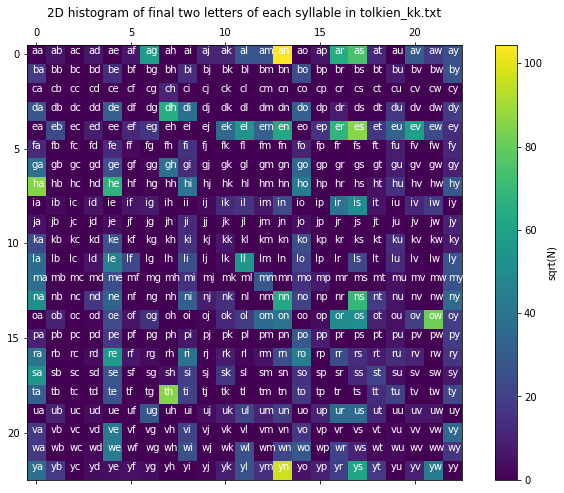

In [42]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(alpha_lowercase))
im = ax.matshow(hist2d)
title = "2D histogram of final two letters of each syllable in {f}".format(f=infilename)
ax.set_title(title)
cbar = plt.colorbar(im)
cbar.set_label("sqrt(N)")
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = b+a
        ax.annotate(twoletters,[-0.25+i,j],color="w")